<h1 align="center" style="color: purple;">ACTIVIDAD EXTRACURRICULAR 3B</h1>

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha de entrega:** 28/01/2026

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

<h3 align="center" style="color: purple;">MÓDULO LOGGING</h3>

## Objetivo 
- Conocer y utilizar el módulo de logging en Python. 

## Indicaciones
- Investigue sobre el módulo de logging.
- Cree un ejemplo que: realice logging en consola, en un archivo, en un mensaje de Telegram. 
- Modifique el logging para mostrar el nombre del archivo, incluir la fecha y la hora, cambiar de color, etc. 

### **1. ¿Qué es el módulo logging?**

El módulo **logging** en Python permite registrar información sobre los scripts de Python y realizar un seguimiento de los eventos generados por estos a medida que se ejecutan. Esto ayuda a los desarrolladores a localizar la región exacta del script que requiere atención. Sin el logging, encontrar la causa raíz de un problema en el código puede ser una tarea laboriosa, más aún si el script contiene cientos o miles de líneas de código.

La principal ventaja de contar con la API de logging proporcionada por un módulo de la biblioteca estándar es que todos los módulos Python pueden participar en el logging, lo que permite combinar mensajes de los propios módulos con los de módulos de terceros en el registro de la aplicación.

- **Print vs logging**

Las sentencias de **print** son fáciles de usar, pero no incluyen tantas funciones como los módulos de logging de Python.

Se puede usar la función print() para imprimir valores de variables y comprender un error lógico, que podría funcionar correctamente con scripts sencillos. Sin embargo, si se necesita más información, como la fecha y la hora en que se asignó un valor a la variable, se debe escribir código adicional con la función print().



### **2. Logging en consola**

In [2]:
import logging

logging.basicConfig(level=logging.INFO)
logging.info("Este es un mensaje informativo")
logging.warning("Este es un mensaje de advertencia")
logging.error("Este es un mensaje de error")


INFO:root:Este es un mensaje informativo
ERROR:root:Este es un mensaje de error


- **Cambiar color del logging en consola:**

Se instaló la una librería: *pip install colorlog*

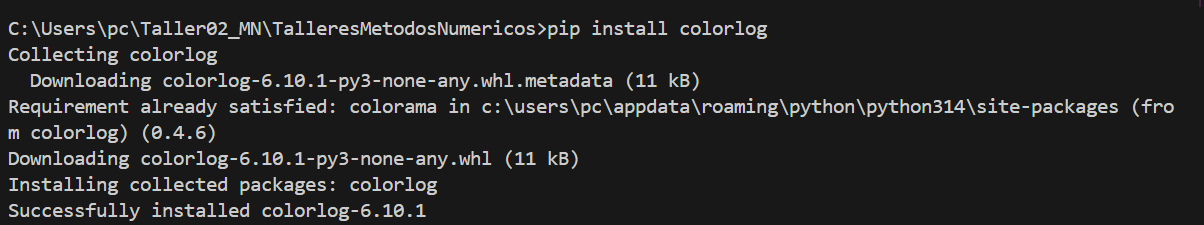

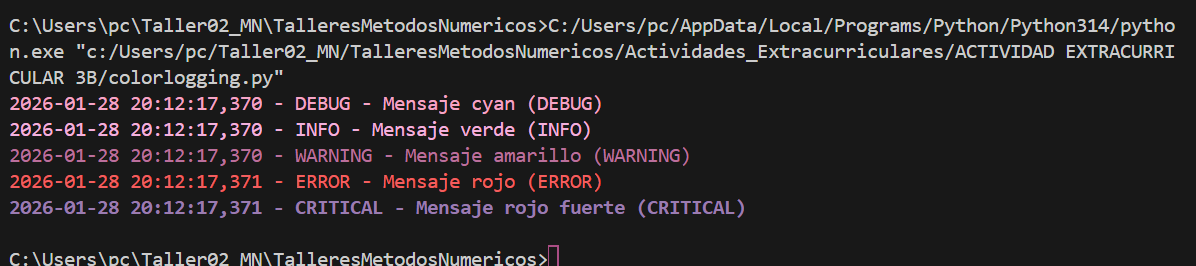

### **3. logging en archivo**

In [3]:
import logging

logging.basicConfig(
    filename="app.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

logging.info("Este mensaje se guarda en el archivo")
logging.error("Error guardado en archivo")


INFO:root:Este mensaje se guarda en el archivo
ERROR:root:Error guardado en archivo


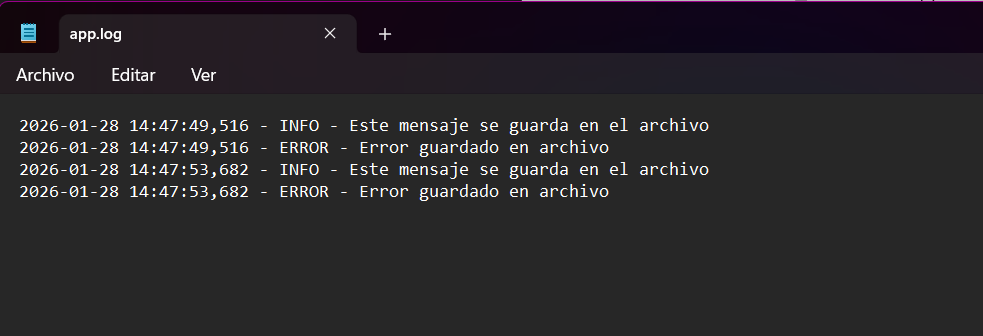

Se creó un archivo llamado app.log.

In [8]:
import logging

logger = logging.getLogger()
logger.handlers.clear()  # MUY importante: borra configuraciones anteriores
logger.setLevel(logging.DEBUG)

formatter = logging.Formatter("%(asctime)s - %(filename)s - %(levelname)s - %(message)s")

# Handler de consola
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

# Handler de archivo
file_handler = logging.FileHandler("app.log")
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Mensaje de depuración")
logger.info("Mensaje informativo")
logger.error("Mensaje de error")




2026-01-28 19:52:25,750 - 2257884387.py - DEBUG - Mensaje de depuración
2026-01-28 19:52:25,763 - 2257884387.py - INFO - Mensaje informativo


2026-01-28 19:52:25,764 - 2257884387.py - ERROR - Mensaje de error


Aparece la fecha, hora, nombre del archivo y mensaje.

### **2. logging en mensaje de Telegram**

Se instaló la librería: *pip install requests*

```python
import logging
import requests
from datetime import datetime
import sys

TOKEN = "TU_TOKEN"
CHAT_ID = "TU_CHAT_ID"

class ColorFormatter(logging.Formatter):
    colores = {
        logging.DEBUG: "\033[94m",
        logging.INFO: "\033[92m",
        logging.WARNING: "\033[93m",
        logging.ERROR: "\033[91m",
        logging.CRITICAL: "\033[95m",
    }
    reset = "\033[0m"
    def format(self, record):
        color = self.colores.get(record.levelno, self.reset)
        formato = f"%(asctime)s | %(levelname)s | %(filename)s | %(message)s"
        return f"{color}{super().format(record)}{self.reset}"

def enviar_telegram(mensaje):
    url = f"https://api.telegram.org/bot{TOKEN}/sendMessage"
    data = {"chat_id": CHAT_ID, "text": mensaje}
    requests.post(url, data=data)

logger = logging.getLogger("ejemplo")
logger.setLevel(logging.DEBUG)

formato = ColorFormatter("%(asctime)s | %(levelname)s | %(filename)s | %(message)s", "%Y-%m-%d %H:%M:%S")

consola = logging.StreamHandler(sys.stdout)
consola.setFormatter(formato)
logger.addHandler(consola)

archivo = logging.FileHandler("registro.log", encoding="utf-8")
archivo.setFormatter(formato)
logger.addHandler(archivo)

class TelegramHandler(logging.Handler):
    def emit(self, record):
        enviar_telegram(self.format(record))

telegram = TelegramHandler()
telegram.setFormatter(logging.Formatter("%(asctime)s | %(levelname)s | %(filename)s | %(message)s"))
logger.addHandler(telegram)

logger.debug("mensaje debug")
logger.info("mensaje info")
logger.warning("mensaje advertencia")
logger.error("mensaje error")
logger.critical("mensaje crítico")

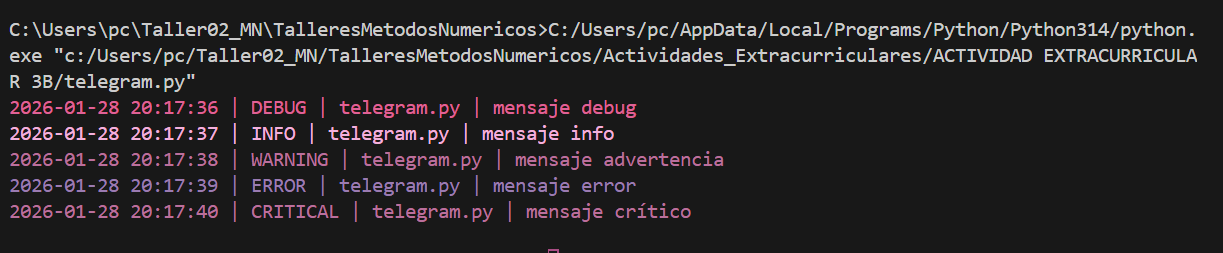